---
# <span style='color:#2a54b2;font-family:Verdana'><center><b>2. MoMo - Escudriñando Olas
---

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
Dejamos atrás el terreno de la especulación, para adentrarnos en el de las estadísticas oficiales, pero portando un dato muy interesante (referente a los días transcurridos desde la vacunación hasta la supuesta muerte del paciente), que intentaremos confirmar o descartar, analizando datos reales de fallecimientos.<br>
Personalmente, creo que tampoco podemos poner la mano en el fuego por las estadísticas "oficiales", pero en principio sí más que por los reportes del VAERS.<br><br>
Así que nos disponemos a analizar los datos de fallecimientos en 2020 y 2021, en base al Momo, del Instituro de Salud Carlos III.<br>
Lo cierto es que sospechaba, desde un principio, que no íbamos a encontrar gran cosa en su dataset, porque aunque los datos están agrupados por rangos de edad, faltan muchos rangos.<br>
Todos los menores de 65 años están agrupados en el mismo, y eso es sencillamente un trabajo incompleto. Puedo entender que al tratarse de fallecimientos, las agrupaciones se centren en la zona en la que suelen producirse, pero sería muy útil que la agrupación de menores de 65 años estuviera subdividida al menos en 4 grupos (e idealmente en 7), sobretodo en casos como éste.<br>
Pero aun así, hemos encontrado cosas interesantes...

---
El archivo CSV que voy a utilizar en este notebook puede descargarse desde el siguiente enlace:  
https://momo.isciii.es/public/momo/dashboard/momo_dashboard.html#datos

<img src="input/logos/momo_logo1.jpeg" width=400 height=400 />

Detalle de las columas que voy a utilizar:  
- **ambito** - Especifica si el ámbito es nacional o comunitario.
- **cod_gedad** - Código correspodiente al rango de edad (los valores posibles son: "all", "menos_65", "65_74" y "mas_74").
- **fecha_defuncion** - Fecha de defunción.
- **defunciones_observadas** - Número de defunciones observadas (incluye la corrección por retraso).
- **defunciones_esperadas** - Número de defunciones esperadas (en base a un modelo predictivo).
---

In [1]:
# Importo las librerías que voy a utilizar:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sbrn
import matplotlib.dates as mdates
from datetime import datetime

In [2]:
# Deshabilito el "chained_assignment", para que no devuelva warnings en algunas modificaciones de columnas:
pandas.set_option('chained_assignment', None)

Importo el archivo CSV:

In [3]:
momo = pandas.read_csv('./input/MoMo/data.csv')

momo

,ambito,cod_ambito,cod_ine_ambito,nombre_ambito,cod_sexo,nombre_sexo,cod_gedad,nombre_gedad,fecha_defuncion,defunciones_observadas,...,defunciones_observadas_lim_sup,defunciones_esperadas,defunciones_esperadas_q01,defunciones_esperadas_q99,defunciones_observadas_etp,defunciones_observadas_lim_inf_etp,defunciones_observadas_lim_sup_etp,defunciones_esperadas_etp,defunciones_esperadas_q01_etp,defunciones_esperadas_q99_etp
0,nacional,NaN,NaN,NaN,all,todos,all,todos,2019-12-01,1062,...,1062.000000,1132.0,1021.44,1238.88,1128,1128,1128,1202.0,1084.6,1315.4
1,nacional,NaN,NaN,NaN,all,todos,all,todos,2019-12-02,1074,...,1074.000000,1132.0,1021.44,1244.38,1140,1140,1140,1202.0,1084.6,1321.3
2,nacional,NaN,NaN,NaN,all,todos,all,todos,2019-12-03,1146,...,1146.000000,1132.0,1021.44,1244.38,1217,1217,1217,1202.0,1084.6,1321.3
3,nacional,NaN,NaN,NaN,all,todos,all,todos,2019-12-04,1114,...,1114.000000,1146.0,1021.44,1244.38,1183,1183,1183,1216.8,1084.6,1321.3
4,nacional,NaN,NaN,NaN,all,todos,all,todos,2019-12-05,1117,...,1117.000000,1146.0,1021.44,1244.38,1186,1186,1186,1216.8,1084.6,1321.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179755,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2021-12-14,1,...,1.186914,0.0,0.00,3.00,1,1,1,0.0,0.0,3.2
179756,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2021-12-15,1,...,1.236676,0.0,0.00,3.38,1,1,1,0.0,0.0,3.6
179757,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2021-12-16,1,...,1.438611,0.0,0.00,3.38,1,1,2,0.0,0.0,3.6
179758,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2021-12-17,1,...,1.849623,0.0,0.00,3.38,1,0,2,0.0,0.0,3.6


Elimino las columnas que no voy a utilizar:

In [4]:
momo.drop(
        ['cod_ambito','cod_ine_ambito','nombre_ambito','cod_sexo','nombre_sexo','nombre_gedad','defunciones_observadas_lim_inf','defunciones_observadas_lim_sup','defunciones_esperadas_q01','defunciones_esperadas_q99',
         'defunciones_observadas_etp','defunciones_observadas_lim_inf_etp','defunciones_observadas_lim_sup_etp','defunciones_esperadas_etp','defunciones_esperadas_q01_etp','defunciones_esperadas_q99_etp'], axis='columns', inplace=True)

momo

,ambito,cod_gedad,fecha_defuncion,defunciones_observadas,defunciones_esperadas
0,nacional,all,2019-12-01,1062,1132.0
1,nacional,all,2019-12-02,1074,1132.0
2,nacional,all,2019-12-03,1146,1132.0
3,nacional,all,2019-12-04,1114,1146.0
4,nacional,all,2019-12-05,1117,1146.0
...,...,...,...,...,...
179755,ccaa,mas_74,2021-12-14,1,0.0
179756,ccaa,mas_74,2021-12-15,1,0.0
179757,ccaa,mas_74,2021-12-16,1,0.0
179758,ccaa,mas_74,2021-12-17,1,0.0


Mantengo solamente los registros de **ámbito nacional**, y correspondientes a los años **2020** y **2021**.  
Además elimino la columna **ambito**, que ya solo tendrá un valor:

In [5]:
# Selecciono los registros de ambito nacional, y de 2020-2021:
momo = momo.query("ambito == 'nacional' and fecha_defuncion.str.contains('202')")

# Elimino la columna 'ambito':
del(momo['ambito'])

momo

,cod_gedad,fecha_defuncion,defunciones_observadas,defunciones_esperadas
31,all,2020-01-01,1159,1275.00
32,all,2020-01-02,1224,1285.00
33,all,2020-01-03,1226,1284.50
34,all,2020-01-04,1240,1287.75
35,all,2020-01-05,1197,1287.75
...,...,...,...,...
8983,mas_74,2021-12-14,543,468.50
8984,mas_74,2021-12-15,505,472.00
8985,mas_74,2021-12-16,521,475.50
8986,mas_74,2021-12-17,436,476.50


Compruebo que no hay **valores null**:

In [6]:
momo.isna().sum()

cod_gedad                 0
fecha_defuncion           0
defunciones_observadas    0
defunciones_esperadas     0
dtype: int64

Compruebo los **tipos de datos**. De momento me interesa dejar la columna **fecha_defuncion** con tipo de datos **object** (**str**):

In [7]:
momo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8616 entries, 31 to 8987
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cod_gedad               8616 non-null   object 
 1   fecha_defuncion         8616 non-null   object 
 2   defunciones_observadas  8616 non-null   int64  
 3   defunciones_esperadas   8616 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 336.6+ KB


El año 2020 es bisiesto, y eso me dará problemas al compararlo con 2021 en un gráfico, así que compruebo los valores de febrero de 2020, y veo que el día 29 tiene valores similares a los días anteriores:

In [8]:
momo.query("fecha_defuncion.str.contains('2020-02') and cod_gedad == 'all'")

,cod_gedad,fecha_defuncion,defunciones_observadas,defunciones_esperadas
62,all,2020-02-01,1314,1289.50
63,all,2020-02-02,1272,1295.75
64,all,2020-02-03,1284,1289.25
65,all,2020-02-04,1305,1301.00
66,all,2020-02-05,1303,1301.00
...,...,...,...,...
1584,all,2020-02-25,555,608.50
1585,all,2020-02-26,515,603.50
1586,all,2020-02-27,583,600.00
1587,all,2020-02-28,517,598.50


Así que decido eliminar los registros correspondientes al 29 de febrero de 2020:

In [9]:
momo.drop(momo[momo['fecha_defuncion'] == '2020-02-29'].index, inplace=True)

Creo un nuevo dataframe, en base a una agrupación por fecha y grupo de edad:

In [10]:
momo_final = momo.groupby(['fecha_defuncion','cod_gedad']).sum().reset_index()

momo_final

,fecha_defuncion,cod_gedad,defunciones_observadas,defunciones_esperadas
0,2020-01-01,65_74,334,343.0
1,2020-01-01,all,2295,2545.5
2,2020-01-01,mas_74,1644,1847.0
3,2020-01-01,menos_65,317,351.0
4,2020-01-02,65_74,342,341.5
...,...,...,...,...
2863,2021-12-17,menos_65,319,332.0
2864,2021-12-18,65_74,301,323.0
2865,2021-12-18,all,2195,2382.5
2866,2021-12-18,mas_74,1580,1727.0


Añado una nueva columna, que solamente contenga el **mes y el día**, otra que solo contenga el **año** y otra que solo contenga el **mes**:

In [11]:
momo_final['mes_dia'] = momo_final['fecha_defuncion'].str.replace('2020-','').str.replace('2021-','')
momo_final['año'] = momo_final['fecha_defuncion'].str.slice(start=0, stop=4)
momo_final['mes'] = momo_final['fecha_defuncion'].str.slice(start=5, stop=7)

momo_final

,fecha_defuncion,cod_gedad,defunciones_observadas,defunciones_esperadas,mes_dia,año,mes
0,2020-01-01,65_74,334,343.0,01-01,2020,01
1,2020-01-01,all,2295,2545.5,01-01,2020,01
2,2020-01-01,mas_74,1644,1847.0,01-01,2020,01
3,2020-01-01,menos_65,317,351.0,01-01,2020,01
4,2020-01-02,65_74,342,341.5,01-02,2020,01
...,...,...,...,...,...,...,...
2863,2021-12-17,menos_65,319,332.0,12-17,2021,12
2864,2021-12-18,65_74,301,323.0,12-18,2021,12
2865,2021-12-18,all,2195,2382.5,12-18,2021,12
2866,2021-12-18,mas_74,1580,1727.0,12-18,2021,12


Añado una columna calculada, que refleje el **exceso de muertes** (restando las **defunciones_esperadas** a las **defunciones_observadas**):

In [12]:
momo_final['exceso_muertes'] = momo_final['defunciones_observadas'] - momo_final['defunciones_esperadas']

momo_final

,fecha_defuncion,cod_gedad,defunciones_observadas,defunciones_esperadas,mes_dia,año,mes,exceso_muertes
0,2020-01-01,65_74,334,343.0,01-01,2020,01,-9.0
1,2020-01-01,all,2295,2545.5,01-01,2020,01,-250.5
2,2020-01-01,mas_74,1644,1847.0,01-01,2020,01,-203.0
3,2020-01-01,menos_65,317,351.0,01-01,2020,01,-34.0
4,2020-01-02,65_74,342,341.5,01-02,2020,01,0.5
...,...,...,...,...,...,...,...,...
2863,2021-12-17,menos_65,319,332.0,12-17,2021,12,-13.0
2864,2021-12-18,65_74,301,323.0,12-18,2021,12,-22.0
2865,2021-12-18,all,2195,2382.5,12-18,2021,12,-187.5
2866,2021-12-18,mas_74,1580,1727.0,12-18,2021,12,-147.0


Hago una agrupación en base a la columna **año** (con la función **sum**), sobre todos los rangos de edad, para comprobar el exceso de muertes por cada año en toda la población:

In [13]:
momo_final.query("cod_gedad == 'all'").groupby('año').sum()

,defunciones_observadas,defunciones_esperadas,exceso_muertes
año,,,
2020,926556,799622.0,126934.0
2021,821410,769911.0,51499.0


Hago una agrupación en base a las columnas **año** y **mes** (con la función **sum**), sobre todos los rangos de edad, para comprobar el exceso de muertes por cada año y mes en toda la población:

In [14]:
momo_final.query("cod_gedad == 'all'").groupby(['año','mes']).sum()

defunciones_observadas  defunciones_esperadas  exceso_muertes
año  mes                                                               
2020 01                    80485               81078.75         -593.75
     02                    66172               71247.50        -5075.50
     03                   107764               72415.25        35348.75
     04                   112808               65065.50        47742.50
     05                    66339               64266.75         2072.25
     06                    58192               60938.75        -2746.75
     07                    65561               63285.00         2276.00
     08                    68049               61536.25         6512.75
     09                    65570               57975.25         7594.75
     10                    75491               63322.25        12168.75
     11                    80511               65417.75        15093.25
     12                    79614               73073.00         6541.00
2021 01                    99437               81869.75        17567.25
     02                    77303               71265.25         6037.75
     03                    70210               72728.50        -2518.50
     04                    65620               65187.00          433.00
     05                    64931               64365.50          565.50
     06                    61677               61127.50          549.50
     07                    66922               63206.50         3715.50
     08                    72340               61701.50        10638.50
     09                    62415               58073.50         4341.50
     10                    65690               63260.50         2429.50
     11                    70503               65567.00         4936.00
     12                    44362               41558.50         2803.50

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
Aquí vemos que en 2021 hubo exceso de fallecimientos TODOS LOS MESES, salvo en marzo y diciembre (pero éste último mes está incompleto), y nos cuesta explicarlo recurriendo a la COVID-19, sobretodo a partir de mediados de año.

Hago un gráfico comparativo de **2020** (en rojo) y **2021** (en azul), con la **cantidad de muertes observadas** y la **cantidad de muertes esperadas** en cada año (en toda la población):

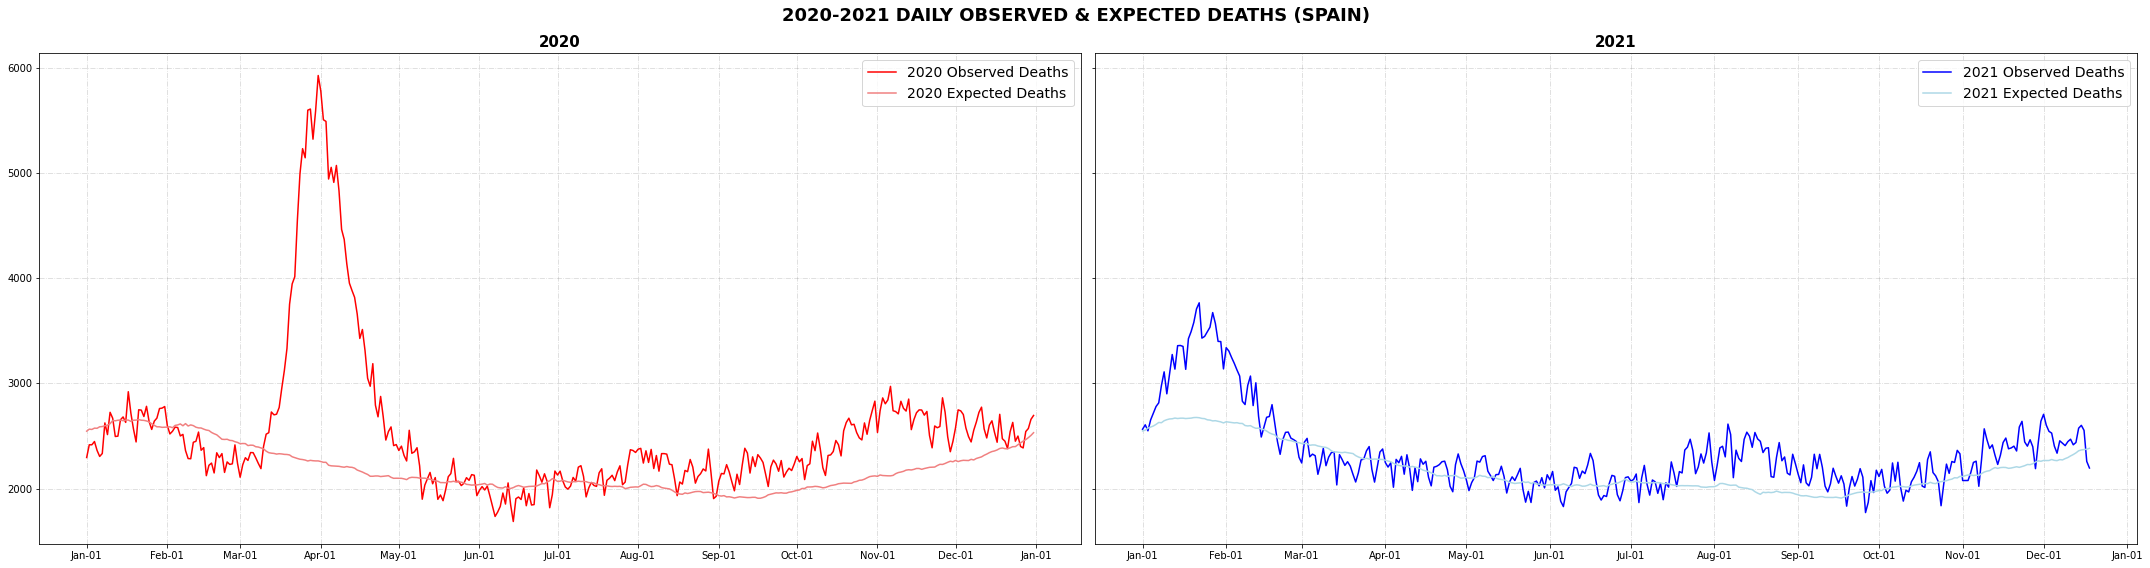

In [15]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(30, 8), sharey=True)

# Defunciones observadas 2020:
x = momo_final.query("año == '2020' and cod_gedad == 'all'")['mes_dia']
y = momo_final.query("año == '2020' and cod_gedad == 'all'")['defunciones_observadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
ax1.plot(xdates, y, label='2020 Observed Deaths', color='red')

# Defunciones esperadas 2020:
x = momo_final.query("año == '2020' and cod_gedad == 'all'")['mes_dia']
y = momo_final.query("año == '2020' and cod_gedad == 'all'")['defunciones_esperadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
ax1.plot(xdates, y, label='2020 Expected Deaths', color='lightcoral')

# Legend, grid, xticks, etc:
ax1.set_title('2020', fontweight='bold', fontsize=15)
ax1.legend(loc='upper right', fontsize=14)
ax1.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax1.xaxis.set_major_locator(mdates.DayLocator((1)))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b-%d"))

# --------------------------------------------------------------------

# Defunciones observadas 2021:
x = momo_final.query("año == '2021' and cod_gedad == 'all'")['mes_dia']
y = momo_final.query("año == '2021' and cod_gedad == 'all'")['defunciones_observadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
ax2.plot(xdates, y, label='2021 Observed Deaths', color='blue')

# Defunciones esperadas 2021:
x = momo_final.query("año == '2021' and cod_gedad == 'all'")['mes_dia']
y = momo_final.query("año == '2021' and cod_gedad == 'all'")['defunciones_esperadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
ax2.plot(xdates, y, label='2021 Expected Deaths', color='lightblue')

# Legend, grid, xticks, etc:
ax2.set_title('2021', fontweight='bold', fontsize=15)
ax2.legend(loc='upper right', fontsize=14)
ax2.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax2.xaxis.set_major_locator(mdates.DayLocator((1)))
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%b-%d"))

# --------------------------------------------------------------------

plt.suptitle('2020-2021 DAILY OBSERVED & EXPECTED DEATHS (SPAIN)', fontweight='bold', fontsize=18)
plt.tight_layout();

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
Pues ya hemos encontrado algo bastante llamativo.<br>
Hay un pico de fallecimientos muy importante (y que supera muy ampliamente las muertes esperadas) justo después de iniciar la vacunación (que empezó a finales de diciembre de 2020), y eso concuerda con lo que hemos visto en el VAERS (donde el grueso de muertes reportadas ocupan los primeros días posteriores a la vacunación).<br>
Y también hay otro pico de fallecimientos (no tan importante) entre julio y setiembre de 2021, que coincide con la vacunación de los rangos de edad inferiores a 50 años.<br>
El primer pico quizá podría achacarse a la COVID-19 (aunque la coincidencia con el inicio de la vacunación da mucho que pensar), pero en el verano de 2021 estaba vacunada toda la población mayor y vulnerable. En principio, ese pico no debería estar alli.<br>
Por otra parte, también hay un exceso de fallecimientos llamativo en noviembre de 2021, que coincide con aplicación de la tercera dosis, que comenzó el 24 de octubre.<br>
Parece que aquí hay cosas que no cuadran, pero sigamos investigando...

Hago otro gráfico comparativo de **2020** (en rojo) y **2021** (en azul), con la **cantidad de muertes observadas** y la **cantidad de muertes esperadas** en cada año, esta vez superpuesto:

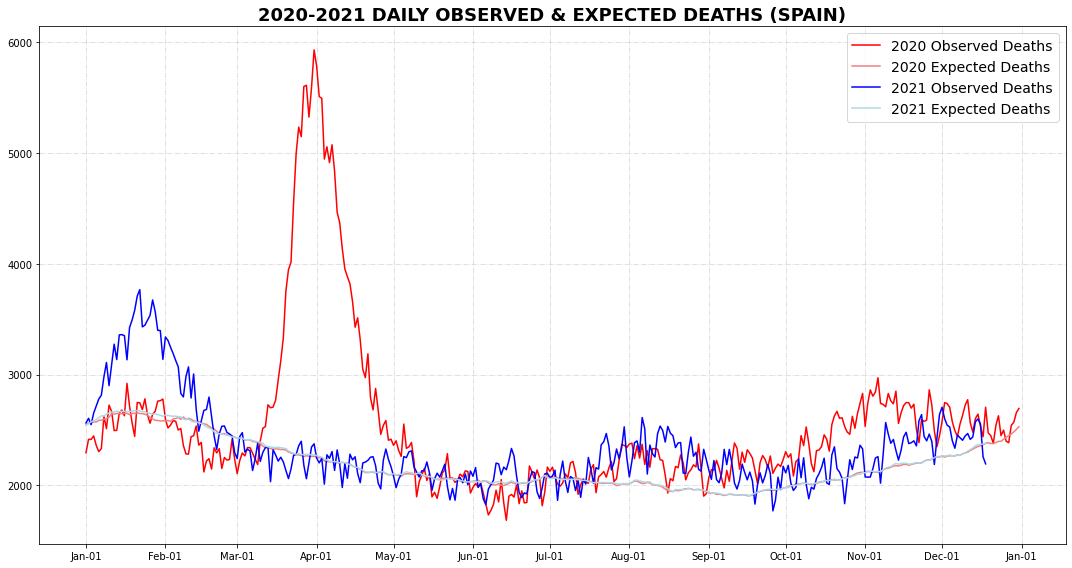

In [16]:
fig = plt.figure(figsize = (15, 8))

# Defunciones observadas 2020:
x = momo_final.query("año == '2020' and cod_gedad == 'all'")['mes_dia']
y = momo_final.query("año == '2020' and cod_gedad == 'all'")['defunciones_observadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
plt.plot(xdates, y, label='2020 Observed Deaths', color='red')

# Defunciones esperadas 2020:
x = momo_final.query("año == '2020' and cod_gedad == 'all'")['mes_dia']
y = momo_final.query("año == '2020' and cod_gedad == 'all'")['defunciones_esperadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
plt.plot(xdates, y, label='2020 Expected Deaths', color='lightcoral')

# Defunciones observadas 2021:
x = momo_final.query("año == '2021' and cod_gedad == 'all'")['mes_dia']
y = momo_final.query("año == '2021' and cod_gedad == 'all'")['defunciones_observadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
plt.plot(xdates, y, label='2021 Observed Deaths', color='blue')

# Defunciones esperadas 2021:
x = momo_final.query("año == '2021' and cod_gedad == 'all'")['mes_dia']
y = momo_final.query("año == '2021' and cod_gedad == 'all'")['defunciones_esperadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
plt.plot(xdates, y, label='2021 Expected Deaths', color='lightblue')

plt.gca().xaxis.set_major_locator(mdates.DayLocator((1)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b-%d"))
#plt.setp(plt.gca().get_xticklabels(), rotation=30, ha="right")

plt.title('2020-2021 DAILY OBSERVED & EXPECTED DEATHS (SPAIN)', fontweight='bold', fontsize=18)
plt.legend(loc='upper right', fontsize=14)
plt.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
plt.tight_layout();

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
Aquí podemos obviar el pico de enero a marzo, porque en ese momento aún no estábamos en pandemia, pero es extraño, como ya hemos dicho, que en julio y agosto de 2021 el pico de fallecimientos también supere al de 2020.<br>
Teníamos entendido que la pandemia afecta sobretodo a la población mayor y vulnerable, que ya estaba totalmente vacunada en ese momento.<br>
Discriminemos por grupos de edad, a ver que encontramos...

Hago una agrupación en base a las columnas **año** y **cod_gedad** (con la función **sum**), para comprobar el exceso de muertes por cada año en cada rango de edad:

In [17]:
momo_final.query("cod_gedad != 'all'").groupby(['año','cod_gedad']).sum()

defunciones_observadas  defunciones_esperadas  exceso_muertes
año  cod_gedad                                                               
2020 65_74                      126146              111231.75        14914.25
     mas_74                     678746              571667.50       107078.50
     menos_65                   121664              115423.00         6241.00
2021 65_74                      117554              107008.50        10545.50
     mas_74                     588316              550822.75        37493.25
     menos_65                   115557              110924.00         4633.00

Hago un gráfico comparativo de **2020** y **2021**, con la **cantidad de muertes observadas** por cada grupo de edad:

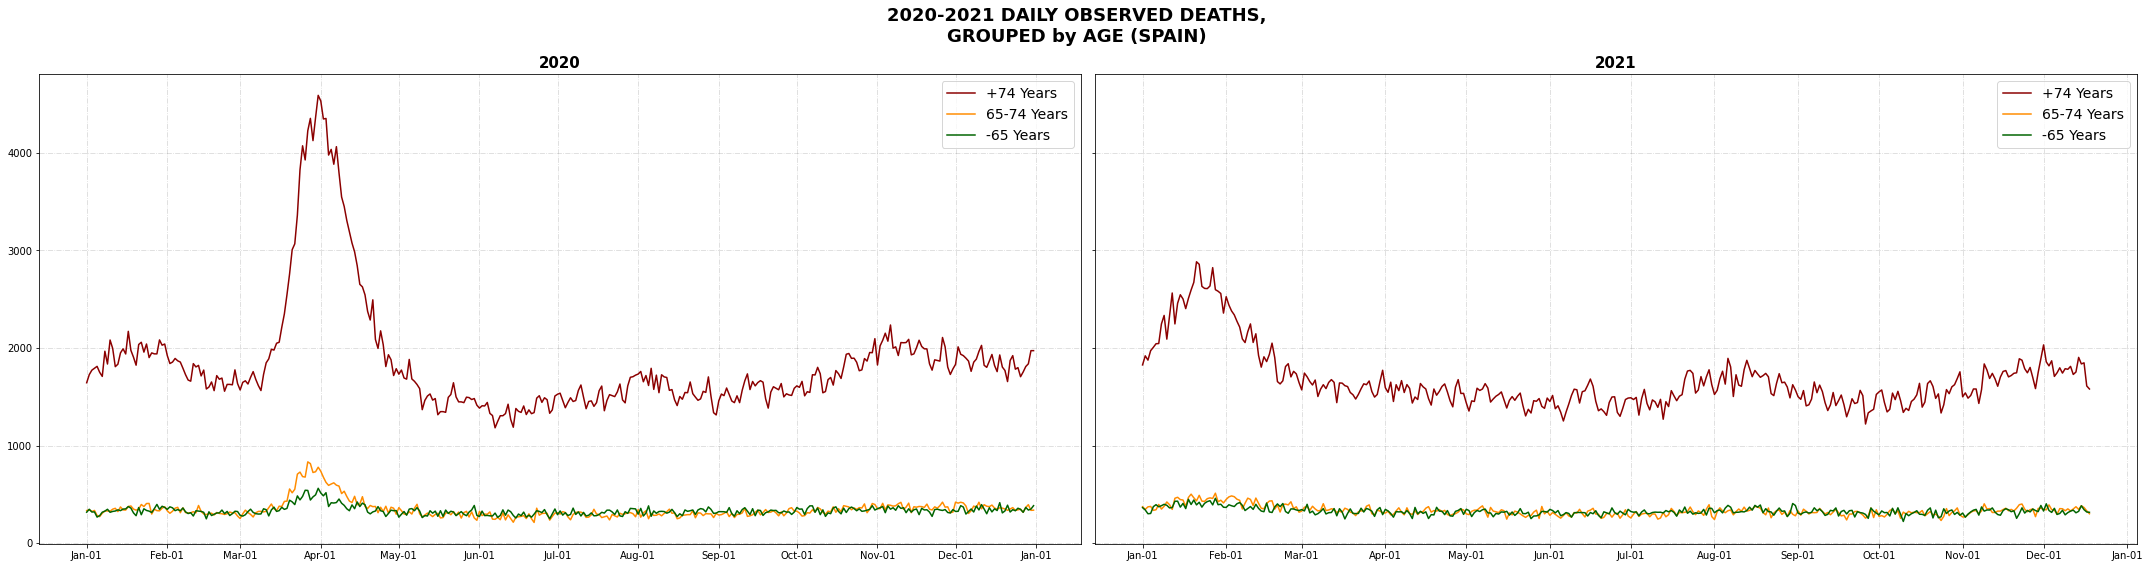

In [18]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(30, 8), sharey=True)

# Defunciones grupo "mas_74", en 2020:
x = momo_final.query("año == '2020' and cod_gedad == 'mas_74'")['mes_dia']
y = momo_final.query("año == '2020' and cod_gedad == 'mas_74'")['defunciones_observadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
ax1.plot(xdates, y, label='+74 Years', color='darkred')

# Defunciones grupo "65_74", en 2020:
x = momo_final.query("año == '2020' and cod_gedad == '65_74'")['mes_dia']
y = momo_final.query("año == '2020' and cod_gedad == '65_74'")['defunciones_observadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
ax1.plot(xdates, y, label='65-74 Years', color='darkorange')

# Defunciones grupo "menos_65", en 2020:
x = momo_final.query("año == '2020' and cod_gedad == 'menos_65'")['mes_dia']
y = momo_final.query("año == '2020' and cod_gedad == 'menos_65'")['defunciones_observadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
ax1.plot(xdates, y, label='-65 Years', color='darkgreen')

# Legend, grid, xticks, etc:
ax1.set_title('2020', fontweight='bold', fontsize=15)
ax1.legend(loc='upper right', fontsize=14)
ax1.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax1.xaxis.set_major_locator(mdates.DayLocator((1)))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b-%d"))

# --------------------------------------------------------------------

# Defunciones grupo "mas_74", en 2021:
x = momo_final.query("año == '2021' and cod_gedad == 'mas_74'")['mes_dia']
y = momo_final.query("año == '2021' and cod_gedad == 'mas_74'")['defunciones_observadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
ax2.plot(xdates, y, label='+74 Years', color='darkred')

# Defunciones grupo "65_74", en 2021:
x = momo_final.query("año == '2021' and cod_gedad == '65_74'")['mes_dia']
y = momo_final.query("año == '2021' and cod_gedad == '65_74'")['defunciones_observadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
ax2.plot(xdates, y, label='65-74 Years', color='darkorange')

# Defunciones grupo "menos_65", en 2020:
x = momo_final.query("año == '2021' and cod_gedad == 'menos_65'")['mes_dia']
y = momo_final.query("año == '2021' and cod_gedad == 'menos_65'")['defunciones_observadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
ax2.plot(xdates, y, label='-65 Years', color='darkgreen')

# Legend, grid, xticks, etc:
ax2.set_title('2021', fontweight='bold', fontsize=15)
ax2.legend(loc='upper right', fontsize=14)
ax2.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax2.xaxis.set_major_locator(mdates.DayLocator((1)))
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%b-%d"))

# --------------------------------------------------------------------

plt.suptitle('2020-2021 DAILY OBSERVED DEATHS,\nGROUPED by AGE (SPAIN)', fontweight='bold', fontsize=18)
plt.tight_layout();

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
En la agrupación que hemos hecho antes que el gráfico, vemos que la diferencia entre el exceso de muertes producido en 2020 con respecto a 2021 solo es realmente llamativa en el rango de edad superior a 74 años.<br>
Y en el gráfico no hemos incluído las muertes esperadas, pero queda claro que el grupo de edad de más de 74 años acapara casi todos los fallecimientos, en todas las olas (esto no es ninguna sorpresa, porque la expectativa de vida en España se sitúa en unos 83 años).<br>
A simple vista, parece que la única ola que ha afectado a los grupos de edad entre 65 y 74 años, y menores de 65, es la famosa ola de marzo-mayo de 2020, pero mejor hagamos un gráfico para cada uno de los rangos de edad, porque la escala puede estar engañándonos, e incluyamos además la predicción de muertes esperadas por cada grupo.

Hago una agrupación en base a las columnas **año** y **mes** (con la función **sum**), sobre el rango de edad **superior a 74 años**, para comprobar el exceso de muertes por cada año y mes en dicho rango:

In [19]:
momo_final.query("cod_gedad == 'mas_74'").groupby(['año','mes']).sum()

defunciones_observadas  defunciones_esperadas  exceso_muertes
año  mes                                                               
2020 01                    59469               59239.00          230.00
     02                    48375               51814.75        -3439.75
     03                    81161               52320.75        28840.25
     04                    87797               46627.00        41170.00
     05                    47337               45622.50         1714.50
     06                    40959               43122.75        -2163.75
     07                    46926               44772.75         2153.25
     08                    48909               43274.75         5634.25
     09                    46690               40446.50         6243.50
     10                    54378               44728.00         9650.00
     11                    59193               46848.00        12345.00
     12                    57552               52850.75         4701.25
2021 01                    74347               60309.25        14037.75
     02                    55774               51910.75         3863.25
     03                    49737               52622.25        -2885.25
     04                    46608               46810.50         -202.50
     05                    45576               45708.00         -132.00
     06                    43503               43268.00          235.00
     07                    47572               44693.50         2878.50
     08                    51835               43374.50         8460.50
     09                    43686               40527.00         3159.00
     10                    46759               44668.50         2090.50
     11                    50703               46927.50         3775.50
     12                    32216               30003.00         2213.00

Hago un gráfico en base a ese rango de edad, para comprobar los valores visualmente:

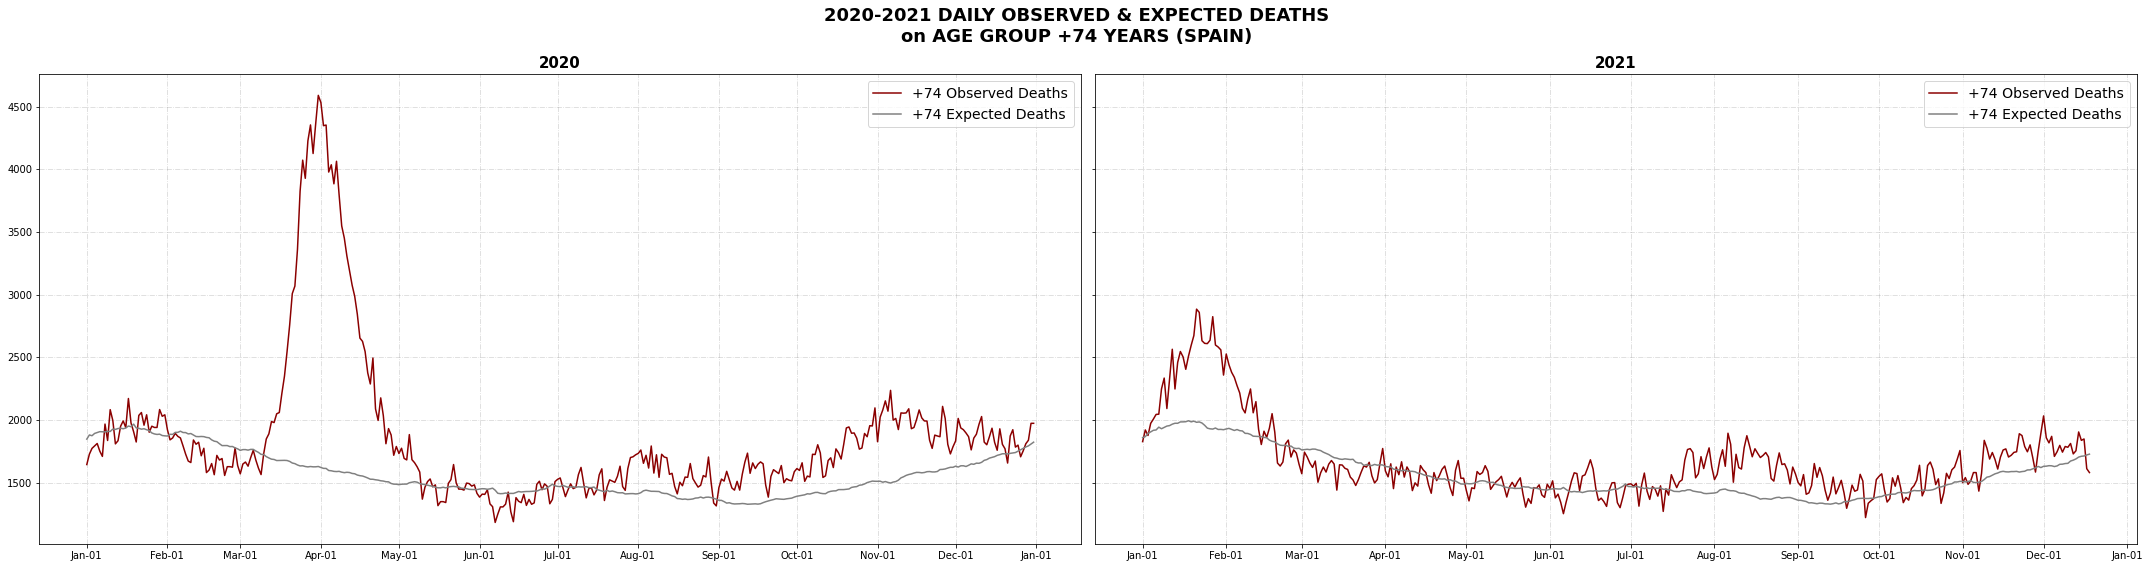

In [20]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(30, 8), sharey=True)

# Defunciones observadas 2020:
x = momo_final.query("año == '2020' and cod_gedad == 'mas_74'")['mes_dia']
y = momo_final.query("año == '2020' and cod_gedad == 'mas_74'")['defunciones_observadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
ax1.plot(xdates, y, label='+74 Observed Deaths', color='darkred')

# Defunciones esperadas 2020:
x = momo_final.query("año == '2020' and cod_gedad == 'mas_74'")['mes_dia']
y = momo_final.query("año == '2020' and cod_gedad == 'mas_74'")['defunciones_esperadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
ax1.plot(xdates, y, label='+74 Expected Deaths', color='gray')

# Legend, grid, xticks, etc:
ax1.set_title('2020', fontweight='bold', fontsize=15)
ax1.legend(loc='upper right', fontsize=14)
ax1.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax1.xaxis.set_major_locator(mdates.DayLocator((1)))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b-%d"))

# --------------------------------------------------------------------

# Defunciones observadas 2021:
x = momo_final.query("año == '2021' and cod_gedad == 'mas_74'")['mes_dia']
y = momo_final.query("año == '2021' and cod_gedad == 'mas_74'")['defunciones_observadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
ax2.plot(xdates, y, label='+74 Observed Deaths', color='darkred')

# Defunciones esperadas 2021:
x = momo_final.query("año == '2021' and cod_gedad == 'mas_74'")['mes_dia']
y = momo_final.query("año == '2021' and cod_gedad == 'mas_74'")['defunciones_esperadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
ax2.plot(xdates, y, label='+74 Expected Deaths', color='gray')

# Legend, grid, xticks, etc:
ax2.set_title('2021', fontweight='bold', fontsize=15)
ax2.legend(loc='upper right', fontsize=14)
ax2.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax2.xaxis.set_major_locator(mdates.DayLocator((1)))
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%b-%d"))

# --------------------------------------------------------------------

plt.suptitle('2020-2021 DAILY OBSERVED & EXPECTED DEATHS\non AGE GROUP +74 YEARS (SPAIN)', fontweight='bold', fontsize=18)
plt.tight_layout();

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
Nuevamente comprobamos que este rango de edad acapara casi todas la muertes producidas en el famoso pico de la pandemia (superando los 4500 casos, cuando en toda la población no llega a los 6000), y que también acapara casi todas las muertes producidas en el pico de enero-febrero de 2021 (llegando casi a 3000 casos, cuando en toda la población se queda en unos 3800).<br>
En cuanto al pico de julio-setiembre de 2021, se queda en unos 1800 casos, cuando en la población general llega a los 2500. Más o menos la misma relación. Y nos vuelve a asaltar una pregunta: ¿por qué hay exceso de muertes en este rango de edad en ese momento, cuando ya estaba totalmente vacunado?

Hago una agrupación en base a las columnas **año** y **mes** (con la función **sum**), sobre el rango de edad **entre 65 y 74 años**, para comprobar el exceso de muertes por cada año y mes en dicho rango:

In [21]:
momo_final.query("cod_gedad == '65_74'").groupby(['año','mes']).sum()

defunciones_observadas  defunciones_esperadas  exceso_muertes
año  mes                                                               
2020 01                    10677               10813.50         -136.50
     02                     8862                9593.50         -731.50
     03                    14736                9948.00         4788.00
     04                    13724                9071.75         4652.25
     05                     9331                9043.00          288.00
     06                     8304                8551.50         -247.50
     07                     9050                8842.75          207.25
     08                     9172                8784.00          388.00
     09                     9258                8404.00          854.00
     10                    10589                9086.50         1502.50
     11                    11109                9105.25         2003.75
     12                    11334                9988.00         1346.00
2021 01                    13007               10878.00         2129.00
     02                    11388                9552.50         1835.50
     03                    10471                9967.00          504.00
     04                     9645                9063.00          582.00
     05                     9746                9038.00          708.00
     06                     8888                8555.00          333.00
     07                     9466                8826.00          640.00
     08                    10017                8803.00         1214.00
     09                     9238                8432.00          806.00
     10                     9421                9088.00          333.00
     11                    10043                9109.00          934.00
     12                     6224                5697.00          527.00

Hago un gráfico en base a ese rango de edad, para comprobar los valores visualmente:

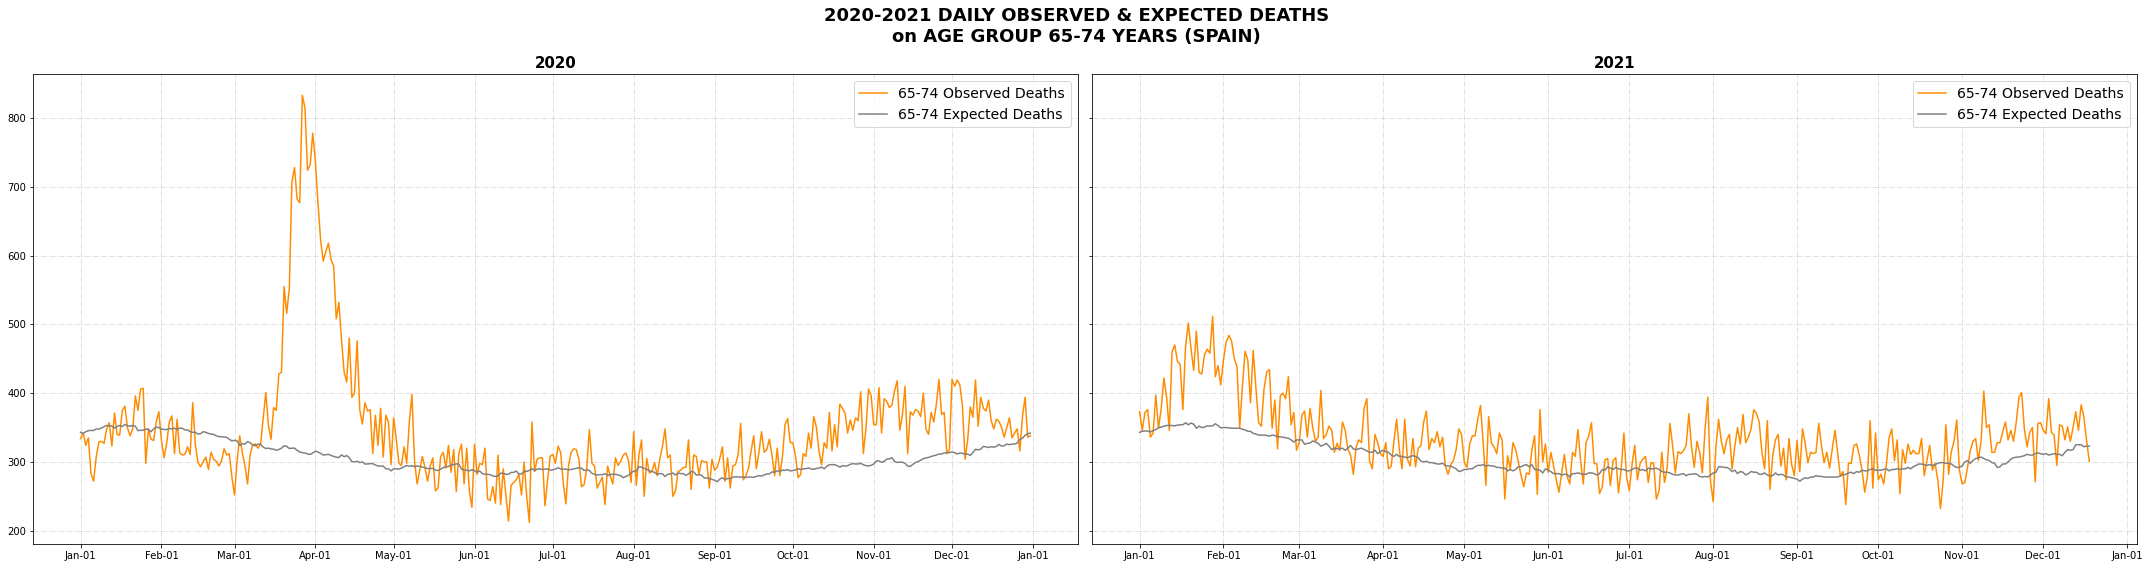

In [22]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(30, 8), sharey=True)

# Defunciones observadas 2020:
x = momo_final.query("año == '2020' and cod_gedad == '65_74'")['mes_dia']
y = momo_final.query("año == '2020' and cod_gedad == '65_74'")['defunciones_observadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
ax1.plot(xdates, y, label='65-74 Observed Deaths', color='darkorange')

# Defunciones esperadas 2020:
x = momo_final.query("año == '2020' and cod_gedad == '65_74'")['mes_dia']
y = momo_final.query("año == '2020' and cod_gedad == '65_74'")['defunciones_esperadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
ax1.plot(xdates, y, label='65-74 Expected Deaths', color='gray')

# Legend, grid, xticks, etc:
ax1.set_title('2020', fontweight='bold', fontsize=15)
ax1.legend(loc='upper right', fontsize=14)
ax1.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax1.xaxis.set_major_locator(mdates.DayLocator((1)))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b-%d"))

# --------------------------------------------------------------------

# Defunciones observadas 2021:
x = momo_final.query("año == '2021' and cod_gedad == '65_74'")['mes_dia']
y = momo_final.query("año == '2021' and cod_gedad == '65_74'")['defunciones_observadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
ax2.plot(xdates, y, label='65-74 Observed Deaths', color='darkorange')

# Defunciones esperadas 2021:
x = momo_final.query("año == '2021' and cod_gedad == '65_74'")['mes_dia']
y = momo_final.query("año == '2021' and cod_gedad == '65_74'")['defunciones_esperadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
ax2.plot(xdates, y, label='65-74 Expected Deaths', color='gray')

# Legend, grid, xticks, etc:
ax2.set_title('2021', fontweight='bold', fontsize=15)
ax2.legend(loc='upper right', fontsize=14)
ax2.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax2.xaxis.set_major_locator(mdates.DayLocator((1)))
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%b-%d"))

# --------------------------------------------------------------------

plt.suptitle('2020-2021 DAILY OBSERVED & EXPECTED DEATHS\non AGE GROUP 65-74 YEARS (SPAIN)', fontweight='bold', fontsize=18)
plt.tight_layout();

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
La gráfica se ve similar en este rango de edad, pero la diferencia de valores es enorme. El pico de la pandemia apenas supera los 800 casos, el de principios de 2021 está sobre los 500 casos, y el de verano de 2021 sobre los 400 casos. Pero está claro que la escala no nos estaba dejando ver la información correctamente.

Hago una agrupación en base a las columnas **año** y **mes** (con la función **sum**), sobre el rango de edad **inferior a 65 años**, para comprobar el exceso de muertes por cada año y mes en dicho rango:

In [23]:
momo_final.query("cod_gedad == 'menos_65'").groupby(['año','mes']).sum()

defunciones_observadas  defunciones_esperadas  exceso_muertes
año  mes                                                               
2020 01                    10339                10844.0          -505.0
     02                     8935                 9563.5          -628.5
     03                    11867                 9941.5          1925.5
     04                    11287                 9277.0          2010.0
     05                     9671                 9512.0           159.0
     06                     8929                 9131.0          -202.0
     07                     9585                 9651.5           -66.5
     08                     9968                 9409.0           559.0
     09                     9622                 9109.5           512.5
     10                    10524                 9472.5          1051.5
     11                    10209                 9318.5           890.5
     12                    10728                10193.0           535.0
2021 01                    12083                10835.0          1248.0
     02                    10141                 9527.0           614.0
     03                    10002                 9937.0            65.0
     04                     9367                 9312.0            55.0
     05                     9609                 9482.0           127.0
     06                     9286                 9116.0           170.0
     07                     9884                 9618.0           266.0
     08                    10488                 9382.0          1106.0
     09                     9491                 9094.0           397.0
     10                     9510                 9469.0            41.0
     11                     9756                 9304.0           452.0
     12                     5940                 5848.0            92.0

Hago un gráfico en base a ese rango de edad, para comprobar los valores visualmente:

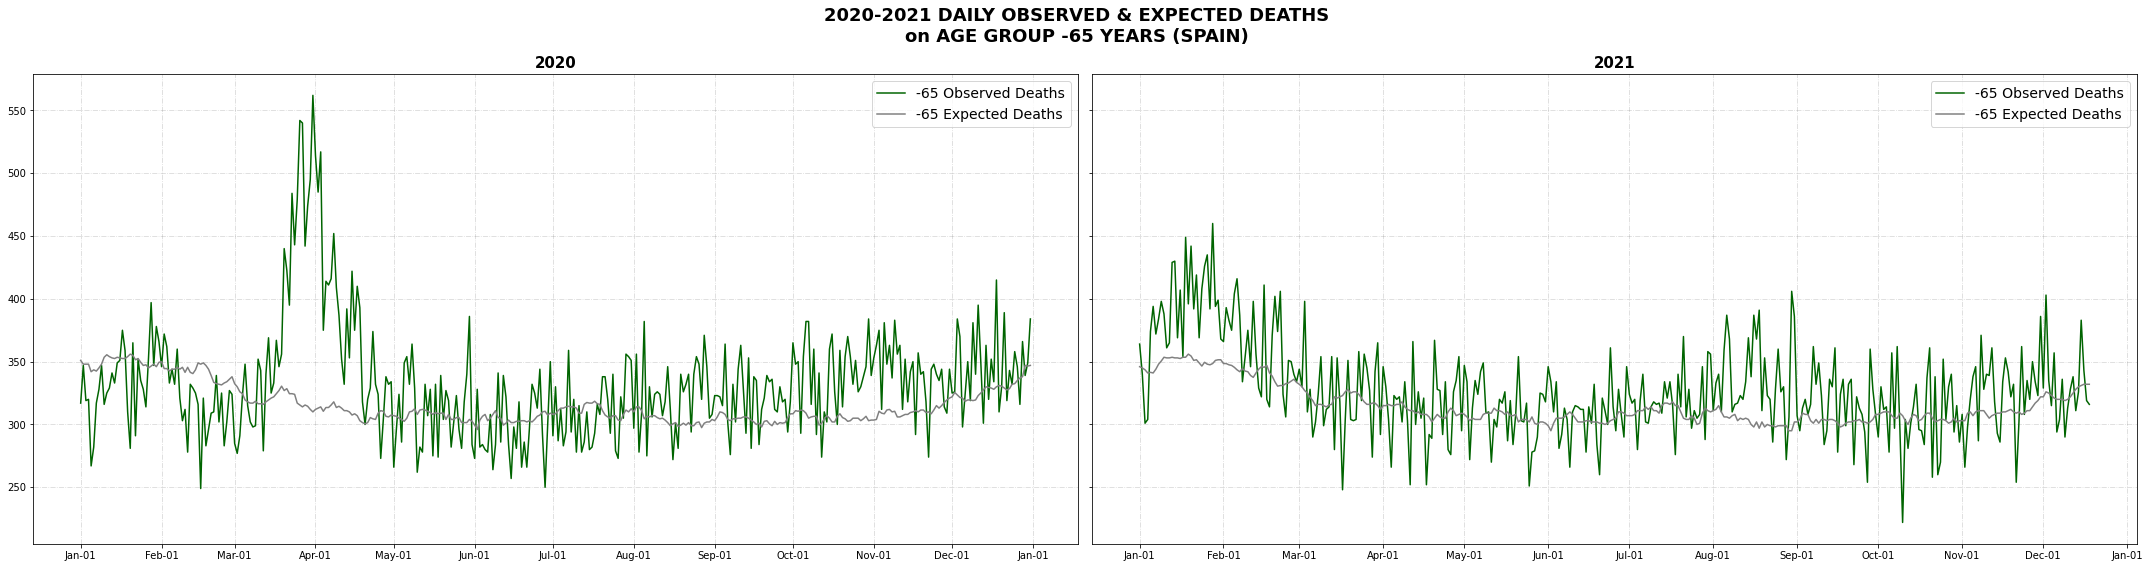

In [24]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(30, 8), sharey=True)

# Defunciones observadas 2020:
x = momo_final.query("año == '2020' and cod_gedad == 'menos_65'")['mes_dia']
y = momo_final.query("año == '2020' and cod_gedad == 'menos_65'")['defunciones_observadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
ax1.plot(xdates, y, label='-65 Observed Deaths', color='darkgreen')

# Defunciones esperadas 2020:
x = momo_final.query("año == '2020' and cod_gedad == 'menos_65'")['mes_dia']
y = momo_final.query("año == '2020' and cod_gedad == 'menos_65'")['defunciones_esperadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
ax1.plot(xdates, y, label='-65 Expected Deaths', color='gray')

# Legend, grid, xticks, etc:
ax1.set_title('2020', fontweight='bold', fontsize=15)
ax1.legend(loc='upper right', fontsize=14)
ax1.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax1.xaxis.set_major_locator(mdates.DayLocator((1)))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b-%d"))

# --------------------------------------------------------------------

# Defunciones observadas 2021:
x = momo_final.query("año == '2021' and cod_gedad == 'menos_65'")['mes_dia']
y = momo_final.query("año == '2021' and cod_gedad == 'menos_65'")['defunciones_observadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
ax2.plot(xdates, y, label='-65 Observed Deaths', color='darkgreen')

# Defunciones esperadas 2021:
x = momo_final.query("año == '2021' and cod_gedad == 'menos_65'")['mes_dia']
y = momo_final.query("año == '2021' and cod_gedad == 'menos_65'")['defunciones_esperadas']
xdates = [datetime.strptime(date_string,'%m-%d') for date_string in x]
ax2.plot(xdates, y, label='-65 Expected Deaths', color='gray')

# Legend, grid, xticks, etc:
ax2.set_title('2021', fontweight='bold', fontsize=15)
ax2.legend(loc='upper right', fontsize=14)
ax2.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax2.xaxis.set_major_locator(mdates.DayLocator((1)))
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%b-%d"))

# --------------------------------------------------------------------

plt.suptitle('2020-2021 DAILY OBSERVED & EXPECTED DEATHS\non AGE GROUP -65 YEARS (SPAIN)', fontweight='bold', fontsize=18)
plt.tight_layout();

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
En este rango de edad, los valores máximos siguen decendiendo, como es lógico (aunque mucho menos que en el caso anterior), pero lo malo es que es un rango demasiado amplio, que incluye nada menos que a todos los menores de 65 años.<br>
Para nuestra investigación, sería interesante saber cuánta gente de este rango se ha vacunado a principios de 2021 (al menos, gran parte de los sanitarios y personal "esencial"), porque ese pico tambien es visible aquí.<br>
Lo que sí que es llamativo es que en agosto-setiembre de 2021 el pico de este rango de edad supere al del rango 65-74 en algunos momentos, justamente coincidiendo con la vacunación de los más jóvenes.<br>
Calculemos el porcentaje de exceso de muertes por cada mes y rango de edad, a ver que nos encontramos...

Sobreescribo el dataframe, quedándome solo con los registros correspondientes a **2021**, y a los **rangos de edad** (y sumando los valores de cada mes):

In [25]:
momo_final = momo_final.query("año == '2021' and cod_gedad != 'all'").groupby(['mes','cod_gedad']).sum()[['defunciones_observadas','defunciones_esperadas','exceso_muertes']].reset_index()

momo_final

,mes,cod_gedad,defunciones_observadas,defunciones_esperadas,exceso_muertes
0,01,65_74,13007,10878.00,2129.00
1,01,mas_74,74347,60309.25,14037.75
2,01,menos_65,12083,10835.00,1248.00
3,02,65_74,11388,9552.50,1835.50
4,02,mas_74,55774,51910.75,3863.25
5,02,menos_65,10141,9527.00,614.00
6,03,65_74,10471,9967.00,504.00
7,03,mas_74,49737,52622.25,-2885.25
8,03,menos_65,10002,9937.00,65.00
9,04,65_74,9645,9063.00,582.00


Creo una **columna calculada**, para reflejar el **porcentaje de exceso de muertes** para cada mes y rango de edad:

In [26]:
# Creo la columna 'porcentaje_exceso', a partir de los valores de las columnas 'exceso_muertes' y 'defunciones_esperadas':
momo_final['porcentaje_exceso'] = (momo_final['exceso_muertes'] * 100) / momo_final['defunciones_esperadas']

# Convierto la nueva columna a tipo de datos "int":
momo_final['porcentaje_exceso'] = momo_final['porcentaje_exceso'].astype('int')

momo_final

,mes,cod_gedad,defunciones_observadas,defunciones_esperadas,exceso_muertes,porcentaje_exceso
0,01,65_74,13007,10878.00,2129.00,19
1,01,mas_74,74347,60309.25,14037.75,23
2,01,menos_65,12083,10835.00,1248.00,11
3,02,65_74,11388,9552.50,1835.50,19
4,02,mas_74,55774,51910.75,3863.25,7
5,02,menos_65,10141,9527.00,614.00,6
6,03,65_74,10471,9967.00,504.00,5
7,03,mas_74,49737,52622.25,-2885.25,-5
8,03,menos_65,10002,9937.00,65.00,0
9,04,65_74,9645,9063.00,582.00,6


<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
Aquí vemos que el rango de edad superior a 74 años tuvo un exceso de fallecimientos de un 23% en enero de 2021, que se desploma a un 7% en febrero, y a un -5% en marzo (en este último mes no tuvo exceso de fallecimientos).<br>
Sin embargo, el rango de edad entre 65 y 74 años tuvo un exceso de fallecimientos de un 19%, tanto en enero como en febrero, y un exceso de un 5% en marzo. ¿Por qué en este grupo se mantuvo el exceso, mucho más que en el grupo superior? Mi opinión es que bien podría ser porque el grupo superior fue vacunado en primera instancia.<br>
En cuanto al rango de edad menor a 65 años, en esos meses sigue una evolución similar a la del rango superior a 75 años (aunque con menor incidencia): 11% de exceso en enero, 6% en febrero y 0% en marzo. Eso podría deberse a que los sanitarios y el personal esencial también fue vacunado en primera instancia, pero quizá sea mucho suponer. De momento, cojámoslo con pinzas.<br>
Posteriormente, en los meses de verano de 2021, lo que vemos es que el porcentaje de exceso de fallecimientos del rango de edad inferior a 65 años se acerca mucho al de los rangos superiores (sobretodo en agosto), coincidiendo con el momento en el que comenzó su campaña de vacunación. Vale, no es algo determinante, pero es otro indicio más.<br>
Pero reflejemos los porcentajes en un gráfico, para analizarlos visualmente...

Hago un gráfico de **2021**, con el **porcentaje de exceso de fallecimientos** por mes y grupo de edad:

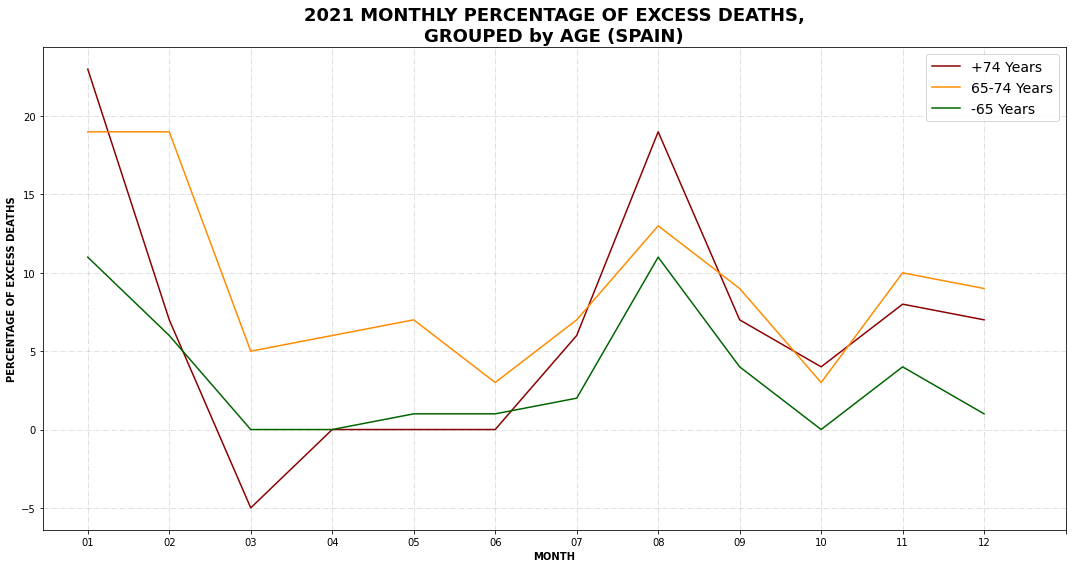

In [27]:
fig = plt.figure(figsize = (15, 8))

# Defunciones grupo "mas_74", en 2020:
x = momo_final.query("cod_gedad == 'mas_74'")['mes']
y = momo_final.query("cod_gedad == 'mas_74'")['porcentaje_exceso']
plt.plot(x, y, label='+74 Years', color='darkred')

# Defunciones grupo "65_74", en 2020:
x = momo_final.query("cod_gedad == '65_74'")['mes']
y = momo_final.query("cod_gedad == '65_74'")['porcentaje_exceso']
plt.plot(x, y, label='65-74 Years', color='darkorange')

# Defunciones grupo "menos_65", en 2020:
x = momo_final.query("cod_gedad == 'menos_65'")['mes']
y = momo_final.query("cod_gedad == 'menos_65'")['porcentaje_exceso']
plt.plot(x, y, label='-65 Years', color='darkgreen')

# Legend, grid, xticks, etc:
plt.title('2021 MONTHLY PERCENTAGE OF EXCESS DEATHS,\nGROUPED by AGE (SPAIN)', fontweight='bold', fontsize=18)
plt.legend(loc='upper right', fontsize=14)
plt.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
plt.xticks(numpy.arange(0, 13))
plt.xlabel('MONTH', fontweight='bold')
plt.ylabel('PERCENTAGE OF EXCESS DEATHS', fontweight='bold')
plt.tight_layout();

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
Sin duda, es llamativa la curva del rango de edad entre 65 y 74 años, que es la única que se mantuvo igual en enero y febrero, y que es la única que tuvo exceso de muertes todo el año, y también es llamativo el despegue de la curva del rango inferior a 65 años en agosto (y subiendo progresivamente desde abril).<br>
Pero bueno, lo cierto es que no hemos podido rascar todo lo que pretendíamos del MoMo (algunas cosas que no cuadran, o que parecen apuntar en cierta dirección, pero nada realmente determinante), aunque creo que la cosa habría cambiado sustancialmente si el rango de edad inferior a 65 años estuviera correctamente subdividido.<br>
Sigamos el trayecto, que nos esperan sorpresas...

---